In [2]:
import numpy as np
import gym
import torch
import matplotlib.pyplot as plt
import problem2 as pb2
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
from matplotlib.ticker import LinearLocator
import pickle as pkl
import matplotlib.animation as animation
import plotly.graph_objects as go

matplotlib.rc('animation', html='jshtml')


%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

c:\Users\frede\OneDrive\Documents\KTH_2022_2023\EL2805_RL\Labs\lab1\rl_lab1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()
k = env.action_space.n      # tells you the number of actions
low, high = env.observation_space.low, env.observation_space.high

In [4]:
# Parameters
N_episodes = 200    # Number of episodes to run for training
p = 2
gamma = 1.
lamda = 0.9
epsilon = 0.1

# Fourier base and vectors
etas = np.array(list(itertools.permutations([i for i in range(p+1)], r=2)))

etas = np.array([
       [0, 1],
        [1, 0],
        [2, 1],
        [1, 2]])

size = etas.shape[0]
base, eta_norms = pb2.fourier_basis(etas)

w = np.array([[0.00811316, 0.00945548, 0.00613721, 0.00278877],
        [0.00807464, 0.0071452 , 0.00016493, 0.00356401],
       [0.00774367, 0.00117103, 0.00183444, 0.00852109]])

# Learning rate and m

m = 0.95

alpha = 0.0067
alphas = np.array([alpha/eta_norms[i] for i in range(size)])
decay_rate = 0.2

w_, episode_reward_list, w_best = pb2.sarsa_lambda_boltzman(N_episodes=N_episodes, w_=w, base=base,
                                                temperature=0.5, lamda=lamda, m=m, gamma=gamma, alphas=alphas, decay_rate=decay_rate)
avg_reward, confidence = pb2.evaluate_policy(w=w_best, N_episodes=50, base=base)
print(avg_reward, confidence)



Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 33.60it/s]

-186.9 8.429048306896812


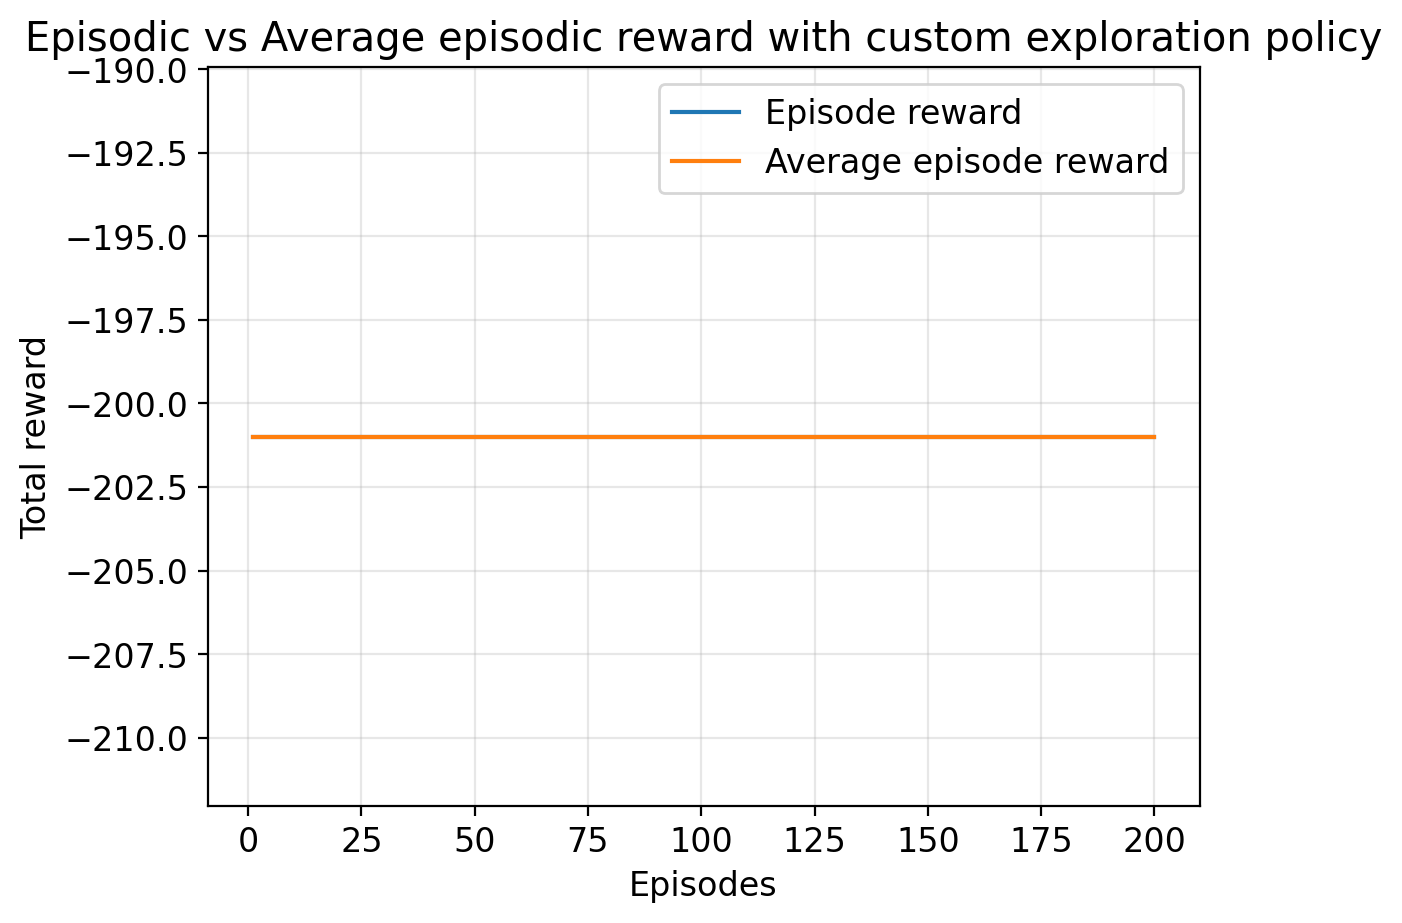

In [120]:
matplotlib.rcParams.update({'font.size': 12})


plt.plot([i for i in range(1, N_episodes+1)], episode_reward_list, label='Episode reward')
plt.plot([i for i in range(1, N_episodes+1)], pb2.running_average(episode_reward_list, 50), label='Average episode reward')
plt.xlabel('Episodes')
plt.ylabel('Total reward')
plt.title("Episodic vs Average episodic reward with custom exploration policy")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

0.001
0
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 28.02it/s]


1
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:00<00:00, 65.69it/s]


2
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 42.23it/s]


3
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:00<00:00, 63.73it/s]


4
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 32.72it/s]


-85.72


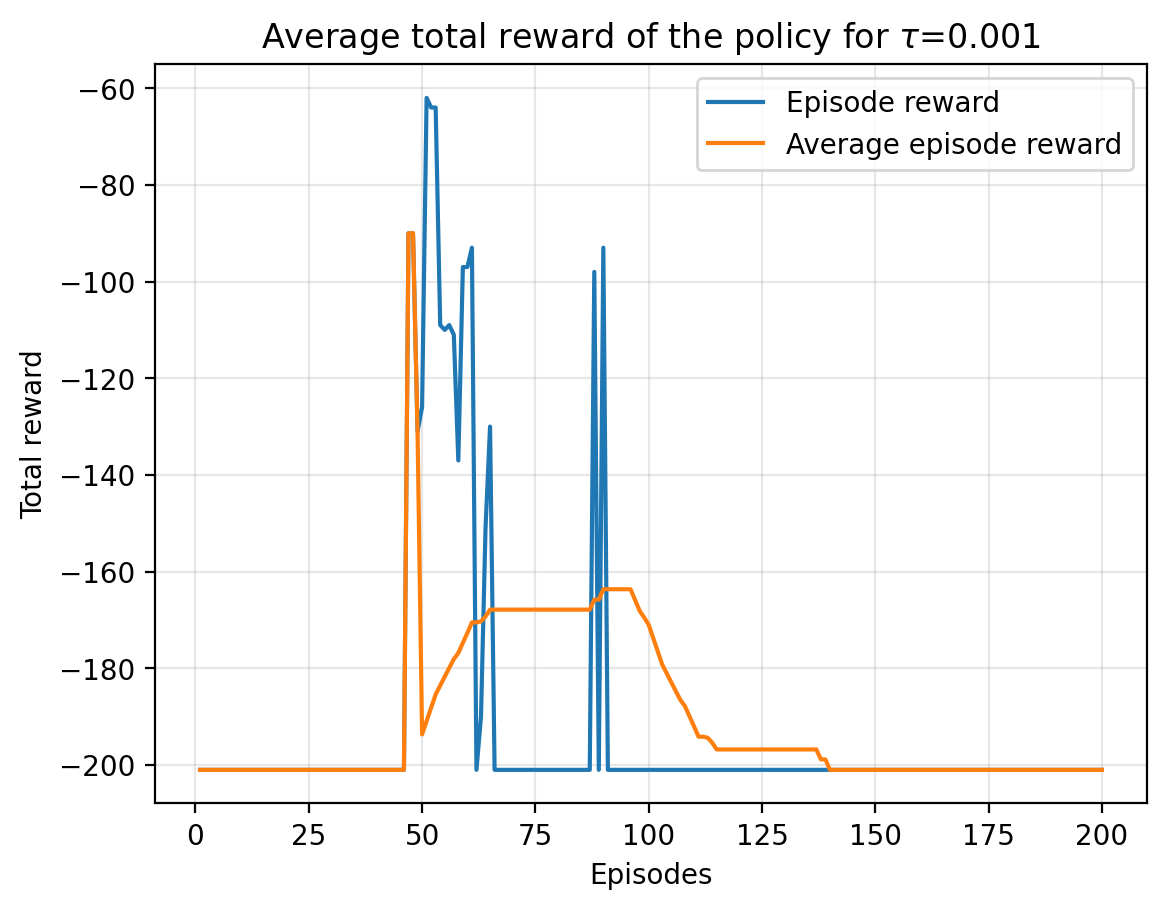

0.0016378937069540646
0
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 32.82it/s]


1
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 33.04it/s]


2
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 33.50it/s]


3
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 33.30it/s]


4
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 30.42it/s]


-201.0


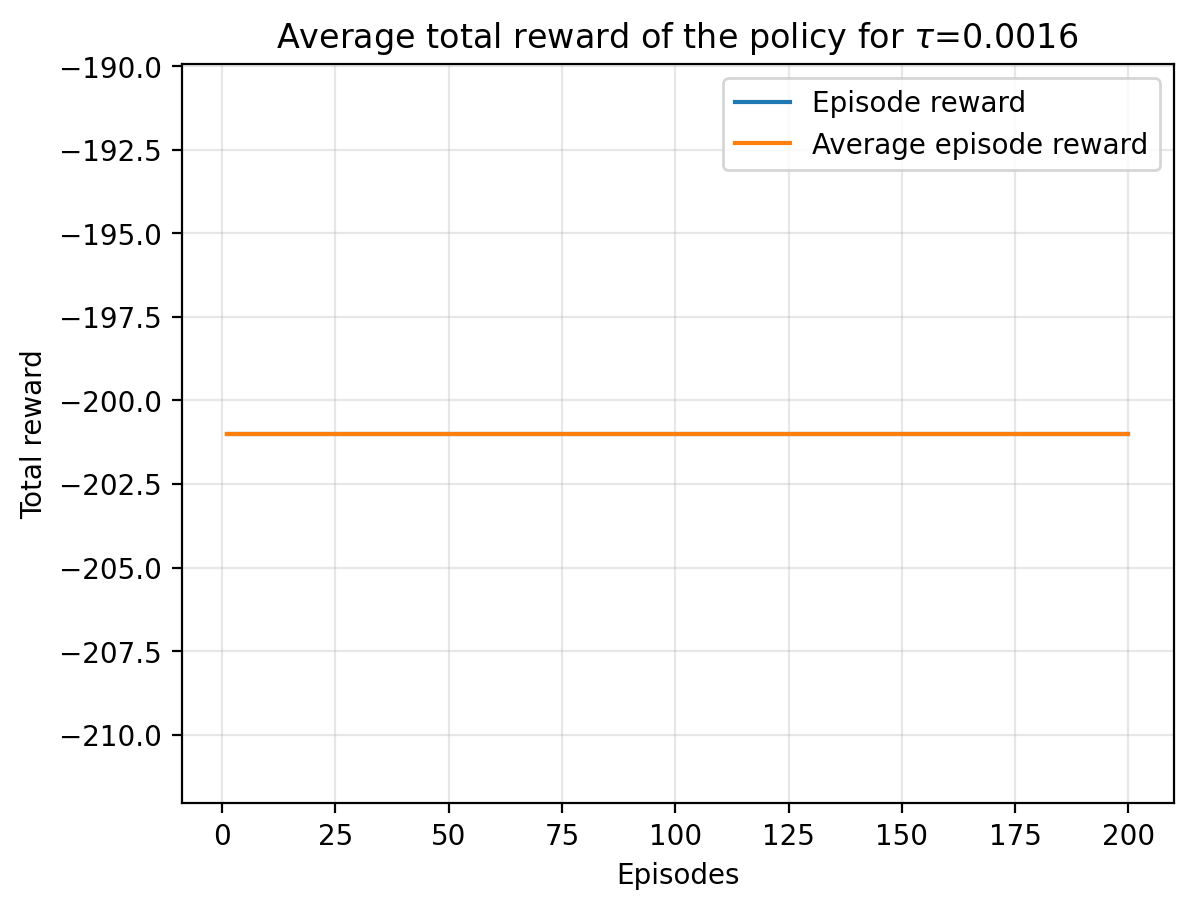

0.0026826957952797246
0
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 40.11it/s]


1
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:00<00:00, 61.14it/s]


2
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 36.13it/s]


3
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 32.01it/s]


4
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 32.52it/s]


-99.92


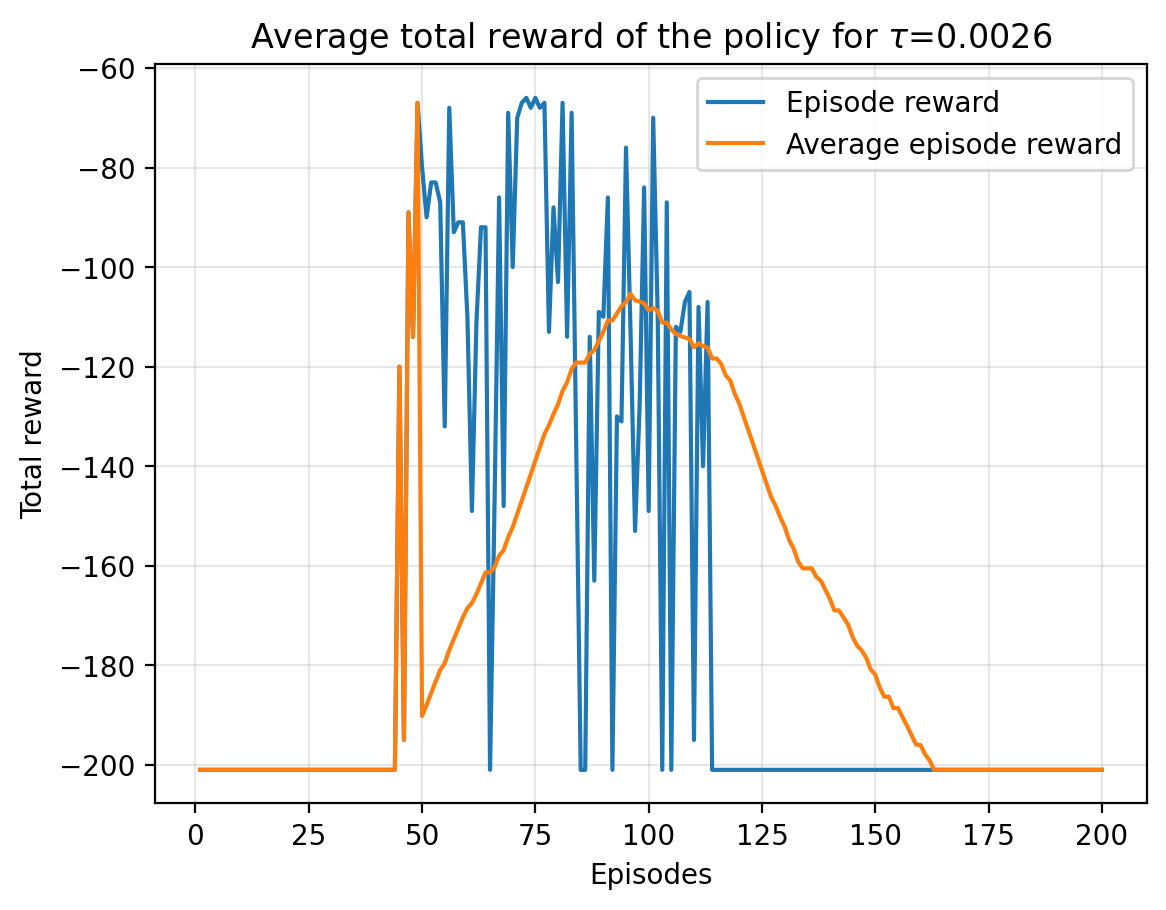

0.004393970560760791
0
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:01<00:00, 44.58it/s]


1
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:00<00:00, 77.10it/s]


2
Checking solution...


Episode 49: 100%|██████████| 50/50 [00:00<00:00, 56.67it/s]


3


In [5]:
params = {"alpha" : np.concatenate([ np.logspace(-5, -3, num=5), np.linspace(0.001, 0.01, num=8), np.logspace(-2, -0.1, num=5)])}
params = {"lamda" : np.array([i * 0.1 for i in range(0, 11)])}
params = {"temperature" : np.concatenate([ np.logspace(-3, 0, num=15), np.linspace(1, 100, num=15)])}

rewards = {}
rewards_lists = {}
confidences = {}
ws = {}
i=0    

for temperature in params["temperature"]:
    print(temperature)
    
    avg_reward_max = -10000
    confidence_max = -10000

    for i in range(5):
        w = np.array([[0.00811316, 0.00945548, 0.00613721, 0.00278877],
        [0.00807464, 0.0071452 , 0.00016493, 0.00356401],
        [0.00774367, 0.00117103, 0.00183444, 0.00852109]])
        print(i)
        w_, episode_reward_list, w_best = pb2.sarsa_lambda_boltzman(N_episodes=N_episodes, w_=w, base=base,
                                                temperature=temperature, lamda=lamda, m=m, gamma=gamma, alphas=alphas, decay_rate=decay_rate)
        avg_reward, confidence = pb2.evaluate_policy(w=w_best, N_episodes=50, base=base)

        if avg_reward > avg_reward_max:
            
            avg_reward_max = avg_reward
            confidence_max = confidence
            rewards[temperature] = avg_reward_max
            confidences[temperature] = confidence_max
            ws[temperature] = w_best
            rewards_lists[temperature] = episode_reward_list
    print(avg_reward_max)
    plt.plot([i for i in range(1, N_episodes+1)], rewards_lists[temperature], label='Episode reward')
    plt.plot([i for i in range(1, N_episodes+1)], pb2.running_average(rewards_lists[temperature], 50), label='Average episode reward')
    plt.xlabel('Episodes')
    plt.ylabel('Total reward')
    plt.title(r"Average total reward of the policy for $\tau$=" + str(temperature)[:6])
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


In [10]:

f = open('weights.pkl', 'rb')
data = pkl.load(f)
w = data['W']
etas = data['N']
base, norms = pb2.fourier_basis(etas=etas)

pb2.evaluate_policy(w=w, N_episodes=50, base=base)

Checking solution...


Episode 49: 100%|██████████| 50/50 [00:00<00:00, 87.55it/s]


(-59.24, 0.4454334482276785)

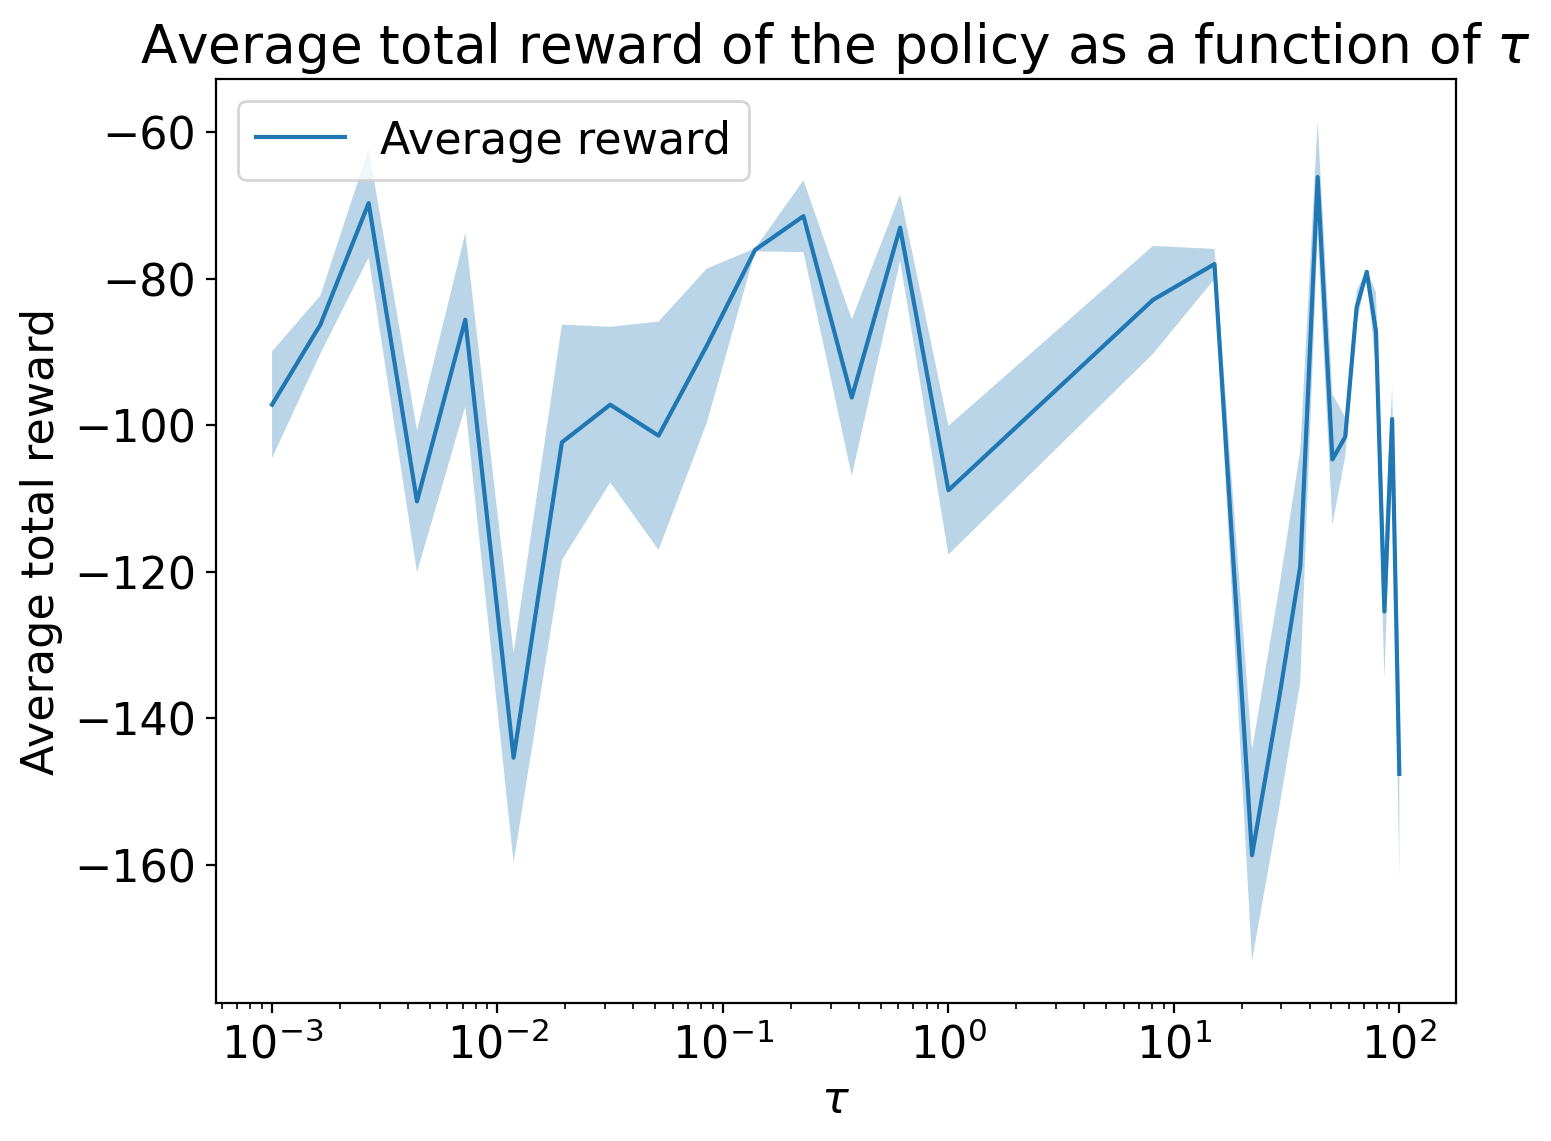

In [124]:
# Training process
matplotlib.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
mean = np.array(list(rewards.values()))
std = np.array(list(confidences.values()))

ax.plot(list(rewards.keys()), mean, label='Average reward')
ax.fill_between(list(rewards.keys()), mean - std, mean + std, alpha=0.3)
ax.set_xlabel(r"$\tau$")
ax.set_ylabel('Average total reward')
ax.set_xscale('log')
ax.set_title(r"Average total reward of the policy as a function of $\tau$")
ax.legend()
plt.show()

In [144]:
[x for _, x in sorted(zip(list(rewards.values()), list(rewards.keys())))]

[22.214285714285715,
 100.0,
 0.011787686347935873,
 29.285714285714285,
 85.85714285714286,
 36.357142857142854,
 0.004393970560760791,
 1.0,
 50.5,
 0.019306977288832496,
 57.57142857142857,
 0.0517947467923121,
 92.92857142857143,
 0.001,
 0.03162277660168379,
 0.3727593720314938,
 0.08483428982440717,
 78.78571428571428,
 0.0016378937069540646,
 0.0071968567300115215,
 64.64285714285714,
 8.071428571428571,
 71.71428571428571,
 15.142857142857142,
 0.13894954943731375,
 0.6105402296585326,
 0.22758459260747887,
 0.0026826957952797246,
 43.42857142857143]

In [143]:
list(rewards.keys())[12]

0.3727593720314938

In [71]:
rewards[0.9] = -59.24
confidences[0.9] = 0.4454334482276785

In [63]:
rewards.keys()

dict_keys([1e-05, 3.1622776601683795e-05, 0.0001, 0.00031622776601683794, 0.001, 0.002285714285714286, 0.0035714285714285718, 0.004857142857142858, 0.0061428571428571435, 0.007428571428571429, 0.008714285714285716, 0.01, 0.029853826189179603, 0.08912509381337455, 0.26607250597988086, 0.7943282347242815])

In [64]:
rewards

{1e-05: -201.0,
 3.1622776601683795e-05: -201.0,
 0.0001: -201.0,
 0.00031622776601683794: -201.0,
 0.001: -62.92,
 0.002285714285714286: -65.94,
 0.0035714285714285718: -70.04,
 0.004857142857142858: -73.34,
 0.0061428571428571435: -62.54,
 0.007428571428571429: -103.46,
 0.008714285714285716: -110.52,
 0.01: -101.94,
 0.029853826189179603: -75.22,
 0.08912509381337455: -60.24,
 0.26607250597988086: -69.74,
 0.7943282347242815: -184.46}

In [19]:
for alpha in params["alpha"]:
  w = np.array([[0.00811316, 0.00945548, 0.00613721, 0.00278877],
        [0.00807464, 0.0071452 , 0.00016493, 0.00356401],
        [0.00774367, 0.00117103, 0.00183444, 0.00852109]])
  print(i)
  i += 1
  eta_norms[-1] = 1
  alphas = np.array([alpha/eta_norms[i] for i in range(size)])
  w_, episode_reward_list, w_best = pb2.sarsa_lambda(N_episodes=N_episodes, w_=w, base=base,
                                    epsilon=epsilon, lamda=lamda, m=m, gamma=gamma, alphas=alphas, decay_rate=decay_rate)
  if max(pb2.running_average(episode_reward_list, 50))> -180.0:
    print(alpha)
    rewards[str(alpha)] = episode_reward_list
    ws[str(alpha)] = w_best
  
  plt.plot([i for i in range(1, N_episodes+1)], episode_reward_list, label='Episode reward')
  plt.plot([i for i in range(1, N_episodes+1)], pb2.running_average(episode_reward_list, 50), label='Average episode reward')
  plt.xlabel('Episodes')
  plt.ylabel('Total reward')
  plt.title(alpha)
  plt.legend()
  plt.grid(alpha=0.3)
  plt.show()

5


KeyboardInterrupt: 

In [145]:
f = open('weights.pkl', 'rb')
data = pkl.load(f)
w = data['W']
etas = data['N']
base, norms = pb2.fourier_basis(etas=etas)

pb2.evaluate_policy(w=w, base=base, N_episodes=50)

Checking solution...


Episode 49: 100%|██████████| 50/50 [00:00<00:00, 79.15it/s]


(-59.58, 0.36390608019102944)

In [85]:
# Load w and etas

f = open('weights.pkl', 'rb')
data = pkl.load(f)
w = data['W']
etas = data['N']
base, norms = pb2.fourier_basis(etas=etas)

X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
Z = pb2.vectorized_V(X, Y, w, base) 
Z = np.interp(Z, (Z.min(), Z.max()), (-200, -60))
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'global_value_function',
    'height': 500,
    'width': 700,
    'scale':6 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

z = Z
x, y = X, Y
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])

fig.update_layout(scene = dict(
                    xaxis_title='Position',
                    yaxis_title='Velocity',
                    zaxis_title='Value function'),
                    title='Value function of the optimal policy',
                    width=700,
                    margin=dict(pad=150, t=50, b=0),
                    yaxis=dict(
                    titlefont=dict(size=50)),
                    scene_camera=dict(eye=dict(x=0., y=0., z=2)
                    ))

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                highlightcolor="limegreen", project_z=False))
fig.show(config=config)


In [79]:
np.interp(Z, (Z.min(), Z.max()), (-200, -60))

array([[-196.95774422, -196.77142677, -196.21482101, ..., -196.21482101,
        -196.77142677, -196.95774422],
       [-196.88822338, -196.45120136, -195.64750404, ..., -196.64714012,
        -196.95362409, -196.88822338],
       [-196.68138112, -195.9971121 , -194.95177133, ..., -196.94128028,
        -196.99705967, -196.68138112],
       ...,
       [-196.68138112, -196.99705967, -196.94128028, ..., -194.95177133,
        -195.9971121 , -196.68138112],
       [-196.88822338, -196.95362409, -196.64714012, ..., -195.64750404,
        -196.45120136, -196.88822338],
       [-196.95774422, -196.77142677, -196.21482101, ..., -196.21482101,
        -196.77142677, -196.95774422]])

In [76]:
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
Z = pb2.vectorized_optimal_policy(X, Y, w_best, base)

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'global_value_function',
    'height': 500,
    'width': 700,
    'scale':6 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

z = Z
x, y = X, Y
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])

fig.update_layout(scene = dict(
                    xaxis_title='Position',
                    yaxis_title='Velocity',
                    zaxis_title='Action'),
                    title='Optimal policy over the state domain',
                    width=700,
                    margin=dict(pad=150, t=50, b=0),
                    yaxis=dict(
                    titlefont=dict(size=50)))

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                highlightcolor="limegreen", project_z=False))
fig.show(config=config)

In [82]:
data = {'W' : w_best, 'N' : etas}
with open('weights.pkl','wb') as f:
    pkl.dump(data, f)

In [74]:
data

{'W': array([[322.54343418, -11.88742261,  42.12922174, -39.34279084],
        [201.1563624 , -50.47712155, 300.03594577,  21.91719859],
        [-54.86055956, 197.39076355,  52.70738829,  32.90178607]]),
 'N': array([[0, 1],
        [1, 0],
        [2, 1],
        [1, 2]])}

In [1]:
def render_policy_net(w, n_max_steps=200, seed=42):
    frames = []
    env = gym.make('MountainCar-v0', render_mode="rgb_array")
    obs = pb2.scale_state_variables(env.reset()[0])
    for step in range(n_max_steps):
        frames.append(env.render())
        action = pb2.epsilon_greedy_policy(s=obs, w=w, base=base, epsilon=0)
        obs, reward, done, info, _ = env.step(action)
        obs = pb2.scale_state_variables(obs, low=low, high=high)
        if done:
            break
    env.close()
    return frames

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

frames = render_policy_net(w_)
plot_animation(frames)

NameError: name 'w_' is not defined